# Import Libraries

In [1]:
%config IPCompleter.greedy=True
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())
# import os.path
# from pathlib import Path
# Path(os.getcwd()).resolve().as_posix()

Model execution started at:Fri Jun 30 23:03:17 2023


In [2]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.albumentationstransforms as preprocessing
import src.utils.utils as utils
import src.models.train_model as train
import src.visualization.plotdata as plotdata
import src.preprocessing.customcompose as customcompose

C:\Users\abhij\anaconda3\envs\pytorch\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
def printgpuinfo():
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)

In [4]:
def showsysteminfo():
    from psutil import virtual_memory
    ram_gb = virtual_memory().total / 1e9
    print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

    if ram_gb < 20:
      print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
      print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
      print('re-execute this cell.')
    else:
      print('You are using a high-RAM runtime!')

In [5]:
# !nvidia-smi --query-gpu=gpu_name,gpu_bus_id,vbios_version --format=csv
# showsysteminfo()
import torch
print(torch.__version__)

2.0.1


In [6]:
# mean,std= utils.Utils.calculatemeanandstddeviation()
mean=[0.5,0.5,0.5]
std=[0.5,0.5,0.5]
print("std={0}",std)
print("mean={0}",mean)
preproc = preprocessing.AlbumentaionsTransforms()
train_transforms = preproc.gettraintransforms(mean,std)
test_transforms = preproc.gettesttransforms(mean,std)
compose_train = customcompose.CustomCompose(train_transforms)
compose_test = customcompose.CustomCompose(test_transforms)

std={0} [0.5, 0.5, 0.5]
mean={0} [0.5, 0.5, 0.5]


In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(compose_train)
test_dataset = ds.gettestdataset(compose_test)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
batch_size = 128
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset,batch_size=batch_size)
train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
128


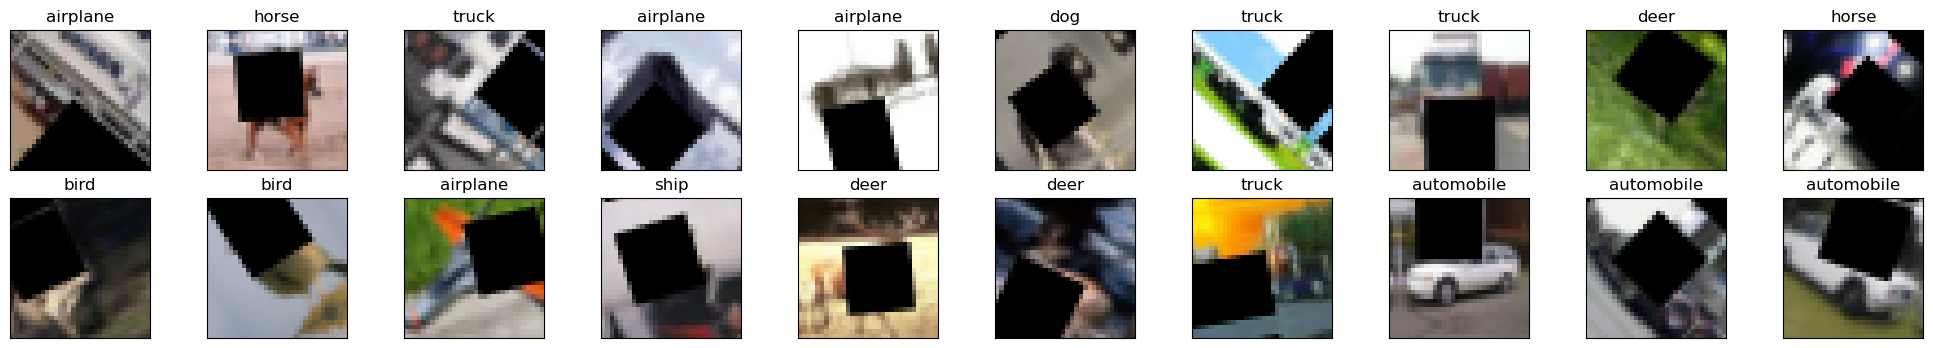

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

dataiterator = iter(train_loader)
plotdata.PlotData.showImagesfromdataset(dataiterator,classes=classes)

In [10]:
cnn_model, device = utils.Utils.createmodel()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,056
DepthwiseSeparableConv2d-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
          Dropout-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 15, 15]          18,432
      BatchNorm2d-12           [-1, 64, 15, 15]             128
             ReLU-13           [-1, 64, 15, 15]               0
          Dropout-14        

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.03, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.9, patience=5,
                                        verbose=True)

In [12]:
lr_data = []
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
epochs = 201
for epoch in range(1, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader, class_correct=class_correct,
                                   class_total=class_total, epoch=epoch)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

EPOCH: 1


  0%|                                                                                                                                                                                                      | 0/391 [00:00<?, ?it/s]C:\Users\abhij\anaconda3\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.587733507156372 Batch_id=390 Accuracy=28.97: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:18<00:00, 21.66it/s]



Test set: Average loss: 0.0148, Accuracy: 3542/10000 (35.42%)

Validation accuracy increased (0.000000 --> 35.420000).  Saving model ...
Learning rate = 0.03  for epoch:  2
EPOCH: 2


Loss=1.4292353391647339 Batch_id=390 Accuracy=36.96: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.33it/s]



Test set: Average loss: 0.0115, Accuracy: 4600/10000 (46.00%)

Validation accuracy increased (35.420000 --> 46.000000).  Saving model ...
Learning rate = 0.03  for epoch:  3
EPOCH: 3


Loss=1.7278703451156616 Batch_id=390 Accuracy=40.26: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.79it/s]



Test set: Average loss: 0.0114, Accuracy: 4656/10000 (46.56%)

Validation accuracy increased (46.000000 --> 46.560000).  Saving model ...
Learning rate = 0.03  for epoch:  4
EPOCH: 4


Loss=1.6239770650863647 Batch_id=390 Accuracy=42.47: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.34it/s]



Test set: Average loss: 0.0113, Accuracy: 4771/10000 (47.71%)

Validation accuracy increased (46.560000 --> 47.710000).  Saving model ...
Learning rate = 0.03  for epoch:  5
EPOCH: 5


Loss=1.6723238229751587 Batch_id=390 Accuracy=44.18: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.99it/s]



Test set: Average loss: 0.0102, Accuracy: 5253/10000 (52.53%)

Validation accuracy increased (47.710000 --> 52.530000).  Saving model ...
Learning rate = 0.03  for epoch:  6
EPOCH: 6


Loss=1.3636046648025513 Batch_id=390 Accuracy=45.94: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.39it/s]



Test set: Average loss: 0.0113, Accuracy: 4950/10000 (49.50%)

Learning rate = 0.03  for epoch:  7
EPOCH: 7


Loss=1.2679578065872192 Batch_id=390 Accuracy=47.55: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.65it/s]



Test set: Average loss: 0.0100, Accuracy: 5517/10000 (55.17%)

Validation accuracy increased (52.530000 --> 55.170000).  Saving model ...
Learning rate = 0.03  for epoch:  8
EPOCH: 8


Loss=1.5023486614227295 Batch_id=390 Accuracy=48.14: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.44it/s]



Test set: Average loss: 0.0097, Accuracy: 5598/10000 (55.98%)

Validation accuracy increased (55.170000 --> 55.980000).  Saving model ...
Learning rate = 0.03  for epoch:  9
EPOCH: 9


Loss=1.4097696542739868 Batch_id=390 Accuracy=49.34: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.20it/s]



Test set: Average loss: 0.0090, Accuracy: 5902/10000 (59.02%)

Validation accuracy increased (55.980000 --> 59.020000).  Saving model ...
Learning rate = 0.03  for epoch:  10
EPOCH: 10


Loss=1.3760290145874023 Batch_id=390 Accuracy=49.78: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.72it/s]



Test set: Average loss: 0.0094, Accuracy: 5823/10000 (58.23%)

Learning rate = 0.03  for epoch:  11
EPOCH: 11


Loss=1.4615615606307983 Batch_id=390 Accuracy=50.60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.95it/s]



Test set: Average loss: 0.0090, Accuracy: 5954/10000 (59.54%)

Validation accuracy increased (59.020000 --> 59.540000).  Saving model ...
Learning rate = 0.03  for epoch:  12
EPOCH: 12


Loss=1.363328218460083 Batch_id=390 Accuracy=51.94: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.94it/s]



Test set: Average loss: 0.0098, Accuracy: 5715/10000 (57.15%)

Learning rate = 0.03  for epoch:  13
EPOCH: 13


Loss=1.2734506130218506 Batch_id=390 Accuracy=52.75: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.15it/s]



Test set: Average loss: 0.0098, Accuracy: 5819/10000 (58.19%)

Learning rate = 0.03  for epoch:  14
EPOCH: 14


Loss=1.284436583518982 Batch_id=390 Accuracy=53.19: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.33it/s]



Test set: Average loss: 0.0094, Accuracy: 5936/10000 (59.36%)

Learning rate = 0.03  for epoch:  15
EPOCH: 15


Loss=1.4164142608642578 Batch_id=390 Accuracy=53.27: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.37it/s]



Test set: Average loss: 0.0086, Accuracy: 6213/10000 (62.13%)

Validation accuracy increased (59.540000 --> 62.130000).  Saving model ...
Learning rate = 0.03  for epoch:  16
EPOCH: 16


Loss=1.276554822921753 Batch_id=390 Accuracy=54.00: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.28it/s]



Test set: Average loss: 0.0098, Accuracy: 5866/10000 (58.66%)

Learning rate = 0.03  for epoch:  17
EPOCH: 17


Loss=1.208247423171997 Batch_id=390 Accuracy=54.49: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.54it/s]



Test set: Average loss: 0.0086, Accuracy: 6174/10000 (61.74%)

Learning rate = 0.03  for epoch:  18
EPOCH: 18


Loss=1.1718474626541138 Batch_id=390 Accuracy=55.09: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.31it/s]



Test set: Average loss: 0.0085, Accuracy: 6285/10000 (62.85%)

Validation accuracy increased (62.130000 --> 62.850000).  Saving model ...
Learning rate = 0.03  for epoch:  19
EPOCH: 19


Loss=1.1986685991287231 Batch_id=390 Accuracy=55.60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.66it/s]



Test set: Average loss: 0.0087, Accuracy: 6202/10000 (62.02%)

Learning rate = 0.03  for epoch:  20
EPOCH: 20


Loss=1.3774663209915161 Batch_id=390 Accuracy=55.70: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.49it/s]



Test set: Average loss: 0.0083, Accuracy: 6336/10000 (63.36%)

Validation accuracy increased (62.850000 --> 63.360000).  Saving model ...
Learning rate = 0.03  for epoch:  21
EPOCH: 21


Loss=1.431537389755249 Batch_id=390 Accuracy=56.12: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.12it/s]



Test set: Average loss: 0.0082, Accuracy: 6388/10000 (63.88%)

Validation accuracy increased (63.360000 --> 63.880000).  Saving model ...
Learning rate = 0.03  for epoch:  22
EPOCH: 22


Loss=1.2291336059570312 Batch_id=390 Accuracy=56.74: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.07it/s]



Test set: Average loss: 0.0084, Accuracy: 6422/10000 (64.22%)

Validation accuracy increased (63.880000 --> 64.220000).  Saving model ...
Learning rate = 0.03  for epoch:  23
EPOCH: 23


Loss=1.2371959686279297 Batch_id=390 Accuracy=56.98: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.56it/s]



Test set: Average loss: 0.0083, Accuracy: 6426/10000 (64.26%)

Validation accuracy increased (64.220000 --> 64.260000).  Saving model ...
Learning rate = 0.03  for epoch:  24
EPOCH: 24


Loss=1.031156301498413 Batch_id=390 Accuracy=57.60: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.13it/s]



Test set: Average loss: 0.0078, Accuracy: 6506/10000 (65.06%)

Validation accuracy increased (64.260000 --> 65.060000).  Saving model ...
Learning rate = 0.03  for epoch:  25
EPOCH: 25


Loss=1.3633100986480713 Batch_id=390 Accuracy=57.29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.76it/s]



Test set: Average loss: 0.0083, Accuracy: 6512/10000 (65.12%)

Validation accuracy increased (65.060000 --> 65.120000).  Saving model ...
Learning rate = 0.03  for epoch:  26
EPOCH: 26


Loss=1.1480931043624878 Batch_id=390 Accuracy=57.92: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.15it/s]



Test set: Average loss: 0.0078, Accuracy: 6547/10000 (65.47%)

Validation accuracy increased (65.120000 --> 65.470000).  Saving model ...
Learning rate = 0.03  for epoch:  27
EPOCH: 27


Loss=1.3642725944519043 Batch_id=390 Accuracy=58.03: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.11it/s]



Test set: Average loss: 0.0071, Accuracy: 6816/10000 (68.16%)

Validation accuracy increased (65.470000 --> 68.160000).  Saving model ...
Learning rate = 0.03  for epoch:  28
EPOCH: 28


Loss=1.4493285417556763 Batch_id=390 Accuracy=58.45: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.59it/s]



Test set: Average loss: 0.0077, Accuracy: 6710/10000 (67.10%)

Learning rate = 0.03  for epoch:  29
EPOCH: 29


Loss=1.1799763441085815 Batch_id=390 Accuracy=58.54: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.69it/s]



Test set: Average loss: 0.0074, Accuracy: 6731/10000 (67.31%)

Learning rate = 0.03  for epoch:  30
EPOCH: 30


Loss=1.2246357202529907 Batch_id=390 Accuracy=58.76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.64it/s]



Test set: Average loss: 0.0071, Accuracy: 6885/10000 (68.85%)

Validation accuracy increased (68.160000 --> 68.850000).  Saving model ...
Learning rate = 0.03  for epoch:  31
EPOCH: 31


Loss=0.9176095128059387 Batch_id=390 Accuracy=59.24: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.15it/s]



Test set: Average loss: 0.0075, Accuracy: 6743/10000 (67.43%)

Learning rate = 0.03  for epoch:  32
EPOCH: 32


Loss=1.0261062383651733 Batch_id=390 Accuracy=59.50: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.46it/s]



Test set: Average loss: 0.0076, Accuracy: 6683/10000 (66.83%)

Learning rate = 0.03  for epoch:  33
EPOCH: 33


Loss=1.1354472637176514 Batch_id=390 Accuracy=59.59: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.23it/s]



Test set: Average loss: 0.0080, Accuracy: 6642/10000 (66.42%)

Learning rate = 0.03  for epoch:  34
EPOCH: 34


Loss=1.270339012145996 Batch_id=390 Accuracy=59.92: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.59it/s]



Test set: Average loss: 0.0076, Accuracy: 6721/10000 (67.21%)

Learning rate = 0.03  for epoch:  35
EPOCH: 35


Loss=1.2246754169464111 Batch_id=390 Accuracy=59.97: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.00it/s]



Test set: Average loss: 0.0070, Accuracy: 6847/10000 (68.47%)

Learning rate = 0.03  for epoch:  36
EPOCH: 36


Loss=1.1476905345916748 Batch_id=390 Accuracy=60.26: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.17it/s]



Test set: Average loss: 0.0071, Accuracy: 6903/10000 (69.03%)

Validation accuracy increased (68.850000 --> 69.030000).  Saving model ...
Epoch 00036: reducing learning rate of group 0 to 2.7000e-02.
Learning rate = 0.027  for epoch:  37
EPOCH: 37


Loss=0.9644361734390259 Batch_id=390 Accuracy=60.84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.11it/s]



Test set: Average loss: 0.0070, Accuracy: 6871/10000 (68.71%)

Learning rate = 0.027  for epoch:  38
EPOCH: 38


Loss=1.2698415517807007 Batch_id=390 Accuracy=60.92: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.47it/s]



Test set: Average loss: 0.0069, Accuracy: 7040/10000 (70.40%)

Validation accuracy increased (69.030000 --> 70.400000).  Saving model ...
Learning rate = 0.027  for epoch:  39
EPOCH: 39


Loss=1.3062820434570312 Batch_id=390 Accuracy=61.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.07it/s]



Test set: Average loss: 0.0071, Accuracy: 6920/10000 (69.20%)

Learning rate = 0.027  for epoch:  40
EPOCH: 40


Loss=1.2690856456756592 Batch_id=390 Accuracy=61.42: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.34it/s]



Test set: Average loss: 0.0064, Accuracy: 7203/10000 (72.03%)

Validation accuracy increased (70.400000 --> 72.030000).  Saving model ...
Learning rate = 0.027  for epoch:  41
EPOCH: 41


Loss=0.9921797513961792 Batch_id=390 Accuracy=61.24: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.93it/s]



Test set: Average loss: 0.0063, Accuracy: 7209/10000 (72.09%)

Validation accuracy increased (72.030000 --> 72.090000).  Saving model ...
Learning rate = 0.027  for epoch:  42
EPOCH: 42


Loss=1.021315336227417 Batch_id=390 Accuracy=61.63: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.07it/s]



Test set: Average loss: 0.0070, Accuracy: 6981/10000 (69.81%)

Learning rate = 0.027  for epoch:  43
EPOCH: 43


Loss=1.1065198183059692 Batch_id=390 Accuracy=61.99: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.68it/s]



Test set: Average loss: 0.0066, Accuracy: 7130/10000 (71.30%)

Learning rate = 0.027  for epoch:  44
EPOCH: 44


Loss=1.1583832502365112 Batch_id=390 Accuracy=61.69: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.19it/s]



Test set: Average loss: 0.0070, Accuracy: 6992/10000 (69.92%)

Learning rate = 0.027  for epoch:  45
EPOCH: 45


Loss=1.1787807941436768 Batch_id=390 Accuracy=62.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.67it/s]



Test set: Average loss: 0.0072, Accuracy: 6943/10000 (69.43%)

Learning rate = 0.027  for epoch:  46
EPOCH: 46


Loss=1.0376532077789307 Batch_id=390 Accuracy=62.12: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.08it/s]



Test set: Average loss: 0.0067, Accuracy: 7130/10000 (71.30%)

Epoch 00046: reducing learning rate of group 0 to 2.4300e-02.
Learning rate = 0.0243  for epoch:  47
EPOCH: 47


Loss=1.1121957302093506 Batch_id=390 Accuracy=62.53: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.63it/s]



Test set: Average loss: 0.0063, Accuracy: 7177/10000 (71.77%)

Learning rate = 0.0243  for epoch:  48
EPOCH: 48


Loss=0.8202260136604309 Batch_id=390 Accuracy=62.37: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.34it/s]



Test set: Average loss: 0.0066, Accuracy: 7082/10000 (70.82%)

Learning rate = 0.0243  for epoch:  49
EPOCH: 49


Loss=0.9794138669967651 Batch_id=390 Accuracy=62.72: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.37it/s]



Test set: Average loss: 0.0074, Accuracy: 6886/10000 (68.86%)

Learning rate = 0.0243  for epoch:  50
EPOCH: 50


Loss=1.0449450016021729 Batch_id=390 Accuracy=62.76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.38it/s]



Test set: Average loss: 0.0062, Accuracy: 7212/10000 (72.12%)

Validation accuracy increased (72.090000 --> 72.120000).  Saving model ...
Learning rate = 0.0243  for epoch:  51
EPOCH: 51


Loss=1.0412414073944092 Batch_id=390 Accuracy=62.49: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.16it/s]



Test set: Average loss: 0.0068, Accuracy: 7150/10000 (71.50%)

Learning rate = 0.0243  for epoch:  52
EPOCH: 52


Loss=1.0911834239959717 Batch_id=390 Accuracy=63.15: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.10it/s]



Test set: Average loss: 0.0072, Accuracy: 6990/10000 (69.90%)

Epoch 00052: reducing learning rate of group 0 to 2.1870e-02.
Learning rate = 0.02187  for epoch:  53
EPOCH: 53


Loss=0.9530290365219116 Batch_id=390 Accuracy=63.21: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.58it/s]



Test set: Average loss: 0.0064, Accuracy: 7192/10000 (71.92%)

Learning rate = 0.02187  for epoch:  54
EPOCH: 54


Loss=1.1695754528045654 Batch_id=390 Accuracy=63.60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.14it/s]



Test set: Average loss: 0.0066, Accuracy: 7121/10000 (71.21%)

Learning rate = 0.02187  for epoch:  55
EPOCH: 55


Loss=1.029255747795105 Batch_id=390 Accuracy=63.27: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.39it/s]



Test set: Average loss: 0.0064, Accuracy: 7230/10000 (72.30%)

Validation accuracy increased (72.120000 --> 72.300000).  Saving model ...
Learning rate = 0.02187  for epoch:  56
EPOCH: 56


Loss=1.1824759244918823 Batch_id=390 Accuracy=63.41: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.33it/s]



Test set: Average loss: 0.0063, Accuracy: 7265/10000 (72.65%)

Validation accuracy increased (72.300000 --> 72.650000).  Saving model ...
Learning rate = 0.02187  for epoch:  57
EPOCH: 57


Loss=1.0002431869506836 Batch_id=390 Accuracy=63.44: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.14it/s]



Test set: Average loss: 0.0066, Accuracy: 7203/10000 (72.03%)

Learning rate = 0.02187  for epoch:  58
EPOCH: 58


Loss=1.1133614778518677 Batch_id=390 Accuracy=64.00: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.20it/s]



Test set: Average loss: 0.0062, Accuracy: 7336/10000 (73.36%)

Validation accuracy increased (72.650000 --> 73.360000).  Saving model ...
Learning rate = 0.02187  for epoch:  59
EPOCH: 59


Loss=0.9113782048225403 Batch_id=390 Accuracy=63.72: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.64it/s]



Test set: Average loss: 0.0061, Accuracy: 7348/10000 (73.48%)

Validation accuracy increased (73.360000 --> 73.480000).  Saving model ...
Learning rate = 0.02187  for epoch:  60
EPOCH: 60


Loss=0.861892819404602 Batch_id=390 Accuracy=63.90: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.94it/s]



Test set: Average loss: 0.0063, Accuracy: 7213/10000 (72.13%)

Learning rate = 0.02187  for epoch:  61
EPOCH: 61


Loss=0.9989439845085144 Batch_id=390 Accuracy=63.69: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.33it/s]



Test set: Average loss: 0.0062, Accuracy: 7314/10000 (73.14%)

Learning rate = 0.02187  for epoch:  62
EPOCH: 62


Loss=1.1495273113250732 Batch_id=390 Accuracy=63.85: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.35it/s]



Test set: Average loss: 0.0063, Accuracy: 7343/10000 (73.43%)

Learning rate = 0.02187  for epoch:  63
EPOCH: 63


Loss=1.178527593612671 Batch_id=390 Accuracy=64.08: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.84it/s]



Test set: Average loss: 0.0062, Accuracy: 7346/10000 (73.46%)

Learning rate = 0.02187  for epoch:  64
EPOCH: 64


Loss=1.156785249710083 Batch_id=390 Accuracy=63.98: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.02it/s]



Test set: Average loss: 0.0061, Accuracy: 7379/10000 (73.79%)

Validation accuracy increased (73.480000 --> 73.790000).  Saving model ...
Epoch 00064: reducing learning rate of group 0 to 1.9683e-02.
Learning rate = 0.019683000000000003  for epoch:  65
EPOCH: 65


Loss=1.062185525894165 Batch_id=390 Accuracy=64.62: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.42it/s]



Test set: Average loss: 0.0063, Accuracy: 7269/10000 (72.69%)

Learning rate = 0.019683000000000003  for epoch:  66
EPOCH: 66


Loss=0.9774380922317505 Batch_id=390 Accuracy=64.21: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.74it/s]



Test set: Average loss: 0.0059, Accuracy: 7440/10000 (74.40%)

Validation accuracy increased (73.790000 --> 74.400000).  Saving model ...
Learning rate = 0.019683000000000003  for epoch:  67
EPOCH: 67


Loss=0.9375743865966797 Batch_id=390 Accuracy=64.56: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.19it/s]



Test set: Average loss: 0.0064, Accuracy: 7306/10000 (73.06%)

Learning rate = 0.019683000000000003  for epoch:  68
EPOCH: 68


Loss=1.0928775072097778 Batch_id=390 Accuracy=64.60: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.94it/s]



Test set: Average loss: 0.0060, Accuracy: 7430/10000 (74.30%)

Learning rate = 0.019683000000000003  for epoch:  69
EPOCH: 69


Loss=1.2504702806472778 Batch_id=390 Accuracy=64.33: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.95it/s]



Test set: Average loss: 0.0061, Accuracy: 7366/10000 (73.66%)

Learning rate = 0.019683000000000003  for epoch:  70
EPOCH: 70


Loss=1.0211659669876099 Batch_id=390 Accuracy=64.67: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.81it/s]



Test set: Average loss: 0.0058, Accuracy: 7501/10000 (75.01%)

Validation accuracy increased (74.400000 --> 75.010000).  Saving model ...
Learning rate = 0.019683000000000003  for epoch:  71
EPOCH: 71


Loss=0.9080413579940796 Batch_id=390 Accuracy=64.43: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.19it/s]



Test set: Average loss: 0.0061, Accuracy: 7384/10000 (73.84%)

Learning rate = 0.019683000000000003  for epoch:  72
EPOCH: 72


Loss=1.186515212059021 Batch_id=390 Accuracy=64.53: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.22it/s]



Test set: Average loss: 0.0059, Accuracy: 7439/10000 (74.39%)

Epoch 00072: reducing learning rate of group 0 to 1.7715e-02.
Learning rate = 0.017714700000000003  for epoch:  73
EPOCH: 73


Loss=0.8671984672546387 Batch_id=390 Accuracy=64.90: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.91it/s]



Test set: Average loss: 0.0057, Accuracy: 7488/10000 (74.88%)

Learning rate = 0.017714700000000003  for epoch:  74
EPOCH: 74


Loss=0.9905482530593872 Batch_id=390 Accuracy=64.85: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.42it/s]



Test set: Average loss: 0.0059, Accuracy: 7433/10000 (74.33%)

Learning rate = 0.017714700000000003  for epoch:  75
EPOCH: 75


Loss=1.0051172971725464 Batch_id=390 Accuracy=64.93: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.16it/s]



Test set: Average loss: 0.0057, Accuracy: 7490/10000 (74.90%)

Learning rate = 0.017714700000000003  for epoch:  76
EPOCH: 76


Loss=1.1419929265975952 Batch_id=390 Accuracy=64.95: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.69it/s]



Test set: Average loss: 0.0059, Accuracy: 7457/10000 (74.57%)

Learning rate = 0.017714700000000003  for epoch:  77
EPOCH: 77


Loss=1.1070425510406494 Batch_id=390 Accuracy=64.92: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.07it/s]



Test set: Average loss: 0.0058, Accuracy: 7413/10000 (74.13%)

Learning rate = 0.017714700000000003  for epoch:  78
EPOCH: 78


Loss=1.1244646310806274 Batch_id=390 Accuracy=65.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.00it/s]



Test set: Average loss: 0.0058, Accuracy: 7541/10000 (75.41%)

Validation accuracy increased (75.010000 --> 75.410000).  Saving model ...
Learning rate = 0.017714700000000003  for epoch:  79
EPOCH: 79


Loss=1.0601065158843994 Batch_id=390 Accuracy=65.35: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.03it/s]



Test set: Average loss: 0.0058, Accuracy: 7481/10000 (74.81%)

Learning rate = 0.017714700000000003  for epoch:  80
EPOCH: 80


Loss=0.9363828897476196 Batch_id=390 Accuracy=65.13: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.00it/s]



Test set: Average loss: 0.0059, Accuracy: 7509/10000 (75.09%)

Learning rate = 0.017714700000000003  for epoch:  81
EPOCH: 81


Loss=0.8286617398262024 Batch_id=390 Accuracy=65.21: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.95it/s]



Test set: Average loss: 0.0058, Accuracy: 7470/10000 (74.70%)

Learning rate = 0.017714700000000003  for epoch:  82
EPOCH: 82


Loss=0.9175056219100952 Batch_id=390 Accuracy=65.28: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.02it/s]



Test set: Average loss: 0.0057, Accuracy: 7514/10000 (75.14%)

Learning rate = 0.017714700000000003  for epoch:  83
EPOCH: 83


Loss=0.8539066314697266 Batch_id=390 Accuracy=65.26: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.98it/s]



Test set: Average loss: 0.0058, Accuracy: 7478/10000 (74.78%)

Learning rate = 0.017714700000000003  for epoch:  84
EPOCH: 84


Loss=1.0817368030548096 Batch_id=390 Accuracy=65.61: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.06it/s]



Test set: Average loss: 0.0058, Accuracy: 7475/10000 (74.75%)

Epoch 00084: reducing learning rate of group 0 to 1.5943e-02.
Learning rate = 0.015943230000000003  for epoch:  85
EPOCH: 85


Loss=0.9396204948425293 Batch_id=390 Accuracy=65.46: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.13it/s]



Test set: Average loss: 0.0055, Accuracy: 7595/10000 (75.95%)

Validation accuracy increased (75.410000 --> 75.950000).  Saving model ...
Learning rate = 0.015943230000000003  for epoch:  86
EPOCH: 86


Loss=1.1296541690826416 Batch_id=390 Accuracy=65.78: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.28it/s]



Test set: Average loss: 0.0054, Accuracy: 7623/10000 (76.23%)

Validation accuracy increased (75.950000 --> 76.230000).  Saving model ...
Learning rate = 0.015943230000000003  for epoch:  87
EPOCH: 87


Loss=1.246211051940918 Batch_id=390 Accuracy=65.85: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.21it/s]



Test set: Average loss: 0.0057, Accuracy: 7548/10000 (75.48%)

Learning rate = 0.015943230000000003  for epoch:  88
EPOCH: 88


Loss=0.888508141040802 Batch_id=390 Accuracy=65.69: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.12it/s]



Test set: Average loss: 0.0060, Accuracy: 7418/10000 (74.18%)

Learning rate = 0.015943230000000003  for epoch:  89
EPOCH: 89


Loss=1.126476526260376 Batch_id=390 Accuracy=65.97: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Test set: Average loss: 0.0057, Accuracy: 7532/10000 (75.32%)

Learning rate = 0.015943230000000003  for epoch:  90
EPOCH: 90


Loss=0.8796097636222839 Batch_id=390 Accuracy=65.68: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Test set: Average loss: 0.0056, Accuracy: 7568/10000 (75.68%)

Learning rate = 0.015943230000000003  for epoch:  91
EPOCH: 91


Loss=0.9768834114074707 Batch_id=390 Accuracy=65.77: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.35it/s]



Test set: Average loss: 0.0055, Accuracy: 7623/10000 (76.23%)

Validation accuracy increased (76.230000 --> 76.230000).  Saving model ...
Learning rate = 0.015943230000000003  for epoch:  92
EPOCH: 92


Loss=0.7691947817802429 Batch_id=390 Accuracy=65.83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.28it/s]



Test set: Average loss: 0.0056, Accuracy: 7581/10000 (75.81%)

Epoch 00092: reducing learning rate of group 0 to 1.4349e-02.
Learning rate = 0.014348907000000003  for epoch:  93
EPOCH: 93


Loss=0.8283516764640808 Batch_id=390 Accuracy=65.83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.12it/s]



Test set: Average loss: 0.0060, Accuracy: 7400/10000 (74.00%)

Learning rate = 0.014348907000000003  for epoch:  94
EPOCH: 94


Loss=1.0573354959487915 Batch_id=390 Accuracy=66.18: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.31it/s]



Test set: Average loss: 0.0057, Accuracy: 7537/10000 (75.37%)

Learning rate = 0.014348907000000003  for epoch:  95
EPOCH: 95


Loss=0.9627208709716797 Batch_id=390 Accuracy=66.01: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.13it/s]



Test set: Average loss: 0.0059, Accuracy: 7515/10000 (75.15%)

Learning rate = 0.014348907000000003  for epoch:  96
EPOCH: 96


Loss=1.0260082483291626 Batch_id=390 Accuracy=66.34: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.24it/s]



Test set: Average loss: 0.0058, Accuracy: 7542/10000 (75.42%)

Learning rate = 0.014348907000000003  for epoch:  97
EPOCH: 97


Loss=0.9002285003662109 Batch_id=390 Accuracy=66.00: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.06it/s]



Test set: Average loss: 0.0056, Accuracy: 7574/10000 (75.74%)

Learning rate = 0.014348907000000003  for epoch:  98
EPOCH: 98


Loss=1.0541415214538574 Batch_id=390 Accuracy=66.25: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.18it/s]



Test set: Average loss: 0.0057, Accuracy: 7582/10000 (75.82%)

Epoch 00098: reducing learning rate of group 0 to 1.2914e-02.
Learning rate = 0.012914016300000003  for epoch:  99
EPOCH: 99


Loss=0.9499338865280151 Batch_id=390 Accuracy=66.48: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.05it/s]



Test set: Average loss: 0.0056, Accuracy: 7587/10000 (75.87%)

Learning rate = 0.012914016300000003  for epoch:  100
EPOCH: 100


Loss=1.0217407941818237 Batch_id=390 Accuracy=66.27: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.26it/s]



Test set: Average loss: 0.0057, Accuracy: 7548/10000 (75.48%)

Learning rate = 0.012914016300000003  for epoch:  101
EPOCH: 101


Loss=0.9328190684318542 Batch_id=390 Accuracy=66.59: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.28it/s]



Test set: Average loss: 0.0059, Accuracy: 7509/10000 (75.09%)

Learning rate = 0.012914016300000003  for epoch:  102
EPOCH: 102


Loss=0.7158545255661011 Batch_id=390 Accuracy=66.47: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.90it/s]



Test set: Average loss: 0.0058, Accuracy: 7515/10000 (75.15%)

Learning rate = 0.012914016300000003  for epoch:  103
EPOCH: 103


Loss=0.8567270040512085 Batch_id=390 Accuracy=66.53: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.12it/s]



Test set: Average loss: 0.0057, Accuracy: 7554/10000 (75.54%)

Learning rate = 0.012914016300000003  for epoch:  104
EPOCH: 104


Loss=0.9718440175056458 Batch_id=390 Accuracy=66.51: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.03it/s]



Test set: Average loss: 0.0060, Accuracy: 7483/10000 (74.83%)

Epoch 00104: reducing learning rate of group 0 to 1.1623e-02.
Learning rate = 0.011622614670000003  for epoch:  105
EPOCH: 105


Loss=0.8795580863952637 Batch_id=390 Accuracy=67.00: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.35it/s]



Test set: Average loss: 0.0055, Accuracy: 7649/10000 (76.49%)

Validation accuracy increased (76.230000 --> 76.490000).  Saving model ...
Learning rate = 0.011622614670000003  for epoch:  106
EPOCH: 106


Loss=0.8476397395133972 Batch_id=390 Accuracy=66.90: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.75it/s]



Test set: Average loss: 0.0055, Accuracy: 7620/10000 (76.20%)

Learning rate = 0.011622614670000003  for epoch:  107
EPOCH: 107


Loss=0.8875338435173035 Batch_id=390 Accuracy=66.92: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.00it/s]



Test set: Average loss: 0.0055, Accuracy: 7630/10000 (76.30%)

Learning rate = 0.011622614670000003  for epoch:  108
EPOCH: 108


Loss=0.907784104347229 Batch_id=390 Accuracy=66.86: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.92it/s]



Test set: Average loss: 0.0054, Accuracy: 7681/10000 (76.81%)

Validation accuracy increased (76.490000 --> 76.810000).  Saving model ...
Learning rate = 0.011622614670000003  for epoch:  109
EPOCH: 109


Loss=1.0652462244033813 Batch_id=390 Accuracy=66.73: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.14it/s]



Test set: Average loss: 0.0056, Accuracy: 7586/10000 (75.86%)

Learning rate = 0.011622614670000003  for epoch:  110
EPOCH: 110


Loss=0.9974309802055359 Batch_id=390 Accuracy=66.88: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.69it/s]



Test set: Average loss: 0.0054, Accuracy: 7669/10000 (76.69%)

Epoch 00110: reducing learning rate of group 0 to 1.0460e-02.
Learning rate = 0.010460353203000003  for epoch:  111
EPOCH: 111


Loss=0.883564293384552 Batch_id=390 Accuracy=67.11: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.13it/s]



Test set: Average loss: 0.0057, Accuracy: 7573/10000 (75.73%)

Learning rate = 0.010460353203000003  for epoch:  112
EPOCH: 112


Loss=1.1266133785247803 Batch_id=390 Accuracy=66.45: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.00it/s]



Test set: Average loss: 0.0056, Accuracy: 7603/10000 (76.03%)

Learning rate = 0.010460353203000003  for epoch:  113
EPOCH: 113


Loss=0.9786770939826965 Batch_id=390 Accuracy=67.14: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.96it/s]



Test set: Average loss: 0.0057, Accuracy: 7565/10000 (75.65%)

Learning rate = 0.010460353203000003  for epoch:  114
EPOCH: 114


Loss=0.7701961994171143 Batch_id=390 Accuracy=67.07: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.94it/s]



Test set: Average loss: 0.0055, Accuracy: 7646/10000 (76.46%)

Learning rate = 0.010460353203000003  for epoch:  115
EPOCH: 115


Loss=1.1700239181518555 Batch_id=390 Accuracy=67.14: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.16it/s]



Test set: Average loss: 0.0055, Accuracy: 7653/10000 (76.53%)

Learning rate = 0.010460353203000003  for epoch:  116
EPOCH: 116


Loss=0.9523247480392456 Batch_id=390 Accuracy=67.10: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.75it/s]



Test set: Average loss: 0.0055, Accuracy: 7629/10000 (76.29%)

Epoch 00116: reducing learning rate of group 0 to 9.4143e-03.
Learning rate = 0.009414317882700002  for epoch:  117
EPOCH: 117


Loss=0.8456135988235474 Batch_id=390 Accuracy=67.20: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.95it/s]



Test set: Average loss: 0.0054, Accuracy: 7689/10000 (76.89%)

Validation accuracy increased (76.810000 --> 76.890000).  Saving model ...
Learning rate = 0.009414317882700002  for epoch:  118
EPOCH: 118


Loss=0.8641440272331238 Batch_id=390 Accuracy=67.26: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.28it/s]



Test set: Average loss: 0.0056, Accuracy: 7600/10000 (76.00%)

Learning rate = 0.009414317882700002  for epoch:  119
EPOCH: 119


Loss=0.8919784426689148 Batch_id=390 Accuracy=67.30: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.79it/s]



Test set: Average loss: 0.0055, Accuracy: 7626/10000 (76.26%)

Learning rate = 0.009414317882700002  for epoch:  120
EPOCH: 120


Loss=0.9462906122207642 Batch_id=390 Accuracy=67.23: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.26it/s]



Test set: Average loss: 0.0053, Accuracy: 7732/10000 (77.32%)

Validation accuracy increased (76.890000 --> 77.320000).  Saving model ...
Learning rate = 0.009414317882700002  for epoch:  121
EPOCH: 121


Loss=0.9177125096321106 Batch_id=390 Accuracy=67.29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.11it/s]



Test set: Average loss: 0.0052, Accuracy: 7713/10000 (77.13%)

Learning rate = 0.009414317882700002  for epoch:  122
EPOCH: 122


Loss=1.0761728286743164 Batch_id=390 Accuracy=67.03: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.84it/s]



Test set: Average loss: 0.0053, Accuracy: 7690/10000 (76.90%)

Learning rate = 0.009414317882700002  for epoch:  123
EPOCH: 123


Loss=0.8269644975662231 Batch_id=390 Accuracy=67.18: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.17it/s]



Test set: Average loss: 0.0055, Accuracy: 7593/10000 (75.93%)

Learning rate = 0.009414317882700002  for epoch:  124
EPOCH: 124


Loss=0.872495174407959 Batch_id=390 Accuracy=67.29: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.01it/s]



Test set: Average loss: 0.0053, Accuracy: 7708/10000 (77.08%)

Learning rate = 0.009414317882700002  for epoch:  125
EPOCH: 125


Loss=1.2299067974090576 Batch_id=390 Accuracy=67.33: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.67it/s]



Test set: Average loss: 0.0053, Accuracy: 7706/10000 (77.06%)

Learning rate = 0.009414317882700002  for epoch:  126
EPOCH: 126


Loss=0.9443764686584473 Batch_id=390 Accuracy=67.09: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.13it/s]



Test set: Average loss: 0.0055, Accuracy: 7670/10000 (76.70%)

Epoch 00126: reducing learning rate of group 0 to 8.4729e-03.
Learning rate = 0.008472886094430003  for epoch:  127
EPOCH: 127


Loss=0.8330339193344116 Batch_id=390 Accuracy=67.52: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.94it/s]



Test set: Average loss: 0.0053, Accuracy: 7694/10000 (76.94%)

Learning rate = 0.008472886094430003  for epoch:  128
EPOCH: 128


Loss=0.906022846698761 Batch_id=390 Accuracy=67.59: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.15it/s]



Test set: Average loss: 0.0055, Accuracy: 7641/10000 (76.41%)

Learning rate = 0.008472886094430003  for epoch:  129
EPOCH: 129


Loss=1.053809404373169 Batch_id=390 Accuracy=67.47: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.47it/s]



Test set: Average loss: 0.0055, Accuracy: 7660/10000 (76.60%)

Learning rate = 0.008472886094430003  for epoch:  130
EPOCH: 130


Loss=0.8493119478225708 Batch_id=390 Accuracy=67.53: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.95it/s]



Test set: Average loss: 0.0056, Accuracy: 7608/10000 (76.08%)

Learning rate = 0.008472886094430003  for epoch:  131
EPOCH: 131


Loss=1.017086386680603 Batch_id=390 Accuracy=67.57: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.58it/s]



Test set: Average loss: 0.0052, Accuracy: 7764/10000 (77.64%)

Validation accuracy increased (77.320000 --> 77.640000).  Saving model ...
Learning rate = 0.008472886094430003  for epoch:  132
EPOCH: 132


Loss=0.7670029401779175 Batch_id=390 Accuracy=67.82: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.12it/s]



Test set: Average loss: 0.0054, Accuracy: 7679/10000 (76.79%)

Epoch 00132: reducing learning rate of group 0 to 7.6256e-03.
Learning rate = 0.007625597484987002  for epoch:  133
EPOCH: 133


Loss=1.0859142541885376 Batch_id=390 Accuracy=67.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.02it/s]



Test set: Average loss: 0.0054, Accuracy: 7729/10000 (77.29%)

Learning rate = 0.007625597484987002  for epoch:  134
EPOCH: 134


Loss=0.8715288043022156 Batch_id=390 Accuracy=67.33: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.37it/s]



Test set: Average loss: 0.0054, Accuracy: 7735/10000 (77.35%)

Learning rate = 0.007625597484987002  for epoch:  135
EPOCH: 135


Loss=0.7923902273178101 Batch_id=390 Accuracy=67.57: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.91it/s]



Test set: Average loss: 0.0053, Accuracy: 7737/10000 (77.37%)

Learning rate = 0.007625597484987002  for epoch:  136
EPOCH: 136


Loss=1.2103996276855469 Batch_id=390 Accuracy=67.84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.11it/s]



Test set: Average loss: 0.0052, Accuracy: 7746/10000 (77.46%)

Learning rate = 0.007625597484987002  for epoch:  137
EPOCH: 137


Loss=0.9489024877548218 Batch_id=390 Accuracy=67.83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.33it/s]



Test set: Average loss: 0.0055, Accuracy: 7631/10000 (76.31%)

Learning rate = 0.007625597484987002  for epoch:  138
EPOCH: 138


Loss=0.990553081035614 Batch_id=390 Accuracy=67.75: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.09it/s]



Test set: Average loss: 0.0053, Accuracy: 7733/10000 (77.33%)

Epoch 00138: reducing learning rate of group 0 to 6.8630e-03.
Learning rate = 0.006863037736488302  for epoch:  139
EPOCH: 139


Loss=0.7766514420509338 Batch_id=390 Accuracy=67.49: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.92it/s]



Test set: Average loss: 0.0054, Accuracy: 7692/10000 (76.92%)

Learning rate = 0.006863037736488302  for epoch:  140
EPOCH: 140


Loss=1.026381254196167 Batch_id=390 Accuracy=67.53: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.48it/s]



Test set: Average loss: 0.0051, Accuracy: 7801/10000 (78.01%)

Validation accuracy increased (77.640000 --> 78.010000).  Saving model ...
Learning rate = 0.006863037736488302  for epoch:  141
EPOCH: 141


Loss=1.0364521741867065 Batch_id=390 Accuracy=67.83: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.95it/s]



Test set: Average loss: 0.0051, Accuracy: 7768/10000 (77.68%)

Learning rate = 0.006863037736488302  for epoch:  142
EPOCH: 142


Loss=0.7409738898277283 Batch_id=390 Accuracy=67.89: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.82it/s]



Test set: Average loss: 0.0053, Accuracy: 7731/10000 (77.31%)

Learning rate = 0.006863037736488302  for epoch:  143
EPOCH: 143


Loss=1.1708757877349854 Batch_id=390 Accuracy=68.05: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.75it/s]



Test set: Average loss: 0.0051, Accuracy: 7763/10000 (77.63%)

Learning rate = 0.006863037736488302  for epoch:  144
EPOCH: 144


Loss=0.9947736859321594 Batch_id=390 Accuracy=67.68: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.72it/s]



Test set: Average loss: 0.0054, Accuracy: 7694/10000 (76.94%)

Epoch 00144: reducing learning rate of group 0 to 6.1767e-03.
Learning rate = 0.0061767339628394724  for epoch:  145
EPOCH: 145


Loss=0.8226282000541687 Batch_id=390 Accuracy=67.59: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.04it/s]



Test set: Average loss: 0.0052, Accuracy: 7765/10000 (77.65%)

Learning rate = 0.0061767339628394724  for epoch:  146
EPOCH: 146


Loss=0.8839151263237 Batch_id=390 Accuracy=68.02: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.60it/s]



Test set: Average loss: 0.0054, Accuracy: 7688/10000 (76.88%)

Learning rate = 0.0061767339628394724  for epoch:  147
EPOCH: 147


Loss=0.9100497364997864 Batch_id=390 Accuracy=67.95: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.88it/s]



Test set: Average loss: 0.0052, Accuracy: 7727/10000 (77.27%)

Learning rate = 0.0061767339628394724  for epoch:  148
EPOCH: 148


Loss=0.7727683782577515 Batch_id=390 Accuracy=67.75: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.68it/s]



Test set: Average loss: 0.0054, Accuracy: 7754/10000 (77.54%)

Learning rate = 0.0061767339628394724  for epoch:  149
EPOCH: 149


Loss=0.7804823517799377 Batch_id=390 Accuracy=67.76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.69it/s]



Test set: Average loss: 0.0052, Accuracy: 7735/10000 (77.35%)

Learning rate = 0.0061767339628394724  for epoch:  150
EPOCH: 150


Loss=1.199344515800476 Batch_id=390 Accuracy=67.69: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.68it/s]



Test set: Average loss: 0.0052, Accuracy: 7765/10000 (77.65%)

Epoch 00150: reducing learning rate of group 0 to 5.5591e-03.
Learning rate = 0.005559060566555525  for epoch:  151
EPOCH: 151


Loss=1.0103096961975098 Batch_id=390 Accuracy=68.19: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 25.00it/s]



Test set: Average loss: 0.0052, Accuracy: 7744/10000 (77.44%)

Learning rate = 0.005559060566555525  for epoch:  152
EPOCH: 152


Loss=0.8632557988166809 Batch_id=390 Accuracy=68.19: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.45it/s]



Test set: Average loss: 0.0053, Accuracy: 7725/10000 (77.25%)

Learning rate = 0.005559060566555525  for epoch:  153
EPOCH: 153


Loss=0.8500325083732605 Batch_id=390 Accuracy=68.13: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.76it/s]



Test set: Average loss: 0.0052, Accuracy: 7796/10000 (77.96%)

Learning rate = 0.005559060566555525  for epoch:  154
EPOCH: 154


Loss=0.8586063385009766 Batch_id=390 Accuracy=68.21: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.96it/s]



Test set: Average loss: 0.0052, Accuracy: 7758/10000 (77.58%)

Learning rate = 0.005559060566555525  for epoch:  155
EPOCH: 155


Loss=0.9401939511299133 Batch_id=390 Accuracy=68.13: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.43it/s]



Test set: Average loss: 0.0051, Accuracy: 7775/10000 (77.75%)

Learning rate = 0.005559060566555525  for epoch:  156
EPOCH: 156


Loss=0.8721860647201538 Batch_id=390 Accuracy=68.02: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.91it/s]



Test set: Average loss: 0.0053, Accuracy: 7715/10000 (77.15%)

Epoch 00156: reducing learning rate of group 0 to 5.0032e-03.
Learning rate = 0.005003154509899972  for epoch:  157
EPOCH: 157


Loss=0.7972247004508972 Batch_id=390 Accuracy=68.18: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.92it/s]



Test set: Average loss: 0.0052, Accuracy: 7739/10000 (77.39%)

Learning rate = 0.005003154509899972  for epoch:  158
EPOCH: 158


Loss=0.6114462018013 Batch_id=390 Accuracy=68.34: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.69it/s]



Test set: Average loss: 0.0052, Accuracy: 7735/10000 (77.35%)

Learning rate = 0.005003154509899972  for epoch:  159
EPOCH: 159


Loss=1.0138970613479614 Batch_id=390 Accuracy=68.28: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.62it/s]



Test set: Average loss: 0.0054, Accuracy: 7670/10000 (76.70%)

Learning rate = 0.005003154509899972  for epoch:  160
EPOCH: 160


Loss=0.9831045866012573 Batch_id=390 Accuracy=68.03: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.70it/s]



Test set: Average loss: 0.0052, Accuracy: 7757/10000 (77.57%)

Learning rate = 0.005003154509899972  for epoch:  161
EPOCH: 161


Loss=0.9030497670173645 Batch_id=390 Accuracy=68.40: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.78it/s]



Test set: Average loss: 0.0051, Accuracy: 7812/10000 (78.12%)

Validation accuracy increased (78.010000 --> 78.120000).  Saving model ...
Learning rate = 0.005003154509899972  for epoch:  162
EPOCH: 162


Loss=0.8836551904678345 Batch_id=390 Accuracy=68.34: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.66it/s]



Test set: Average loss: 0.0052, Accuracy: 7757/10000 (77.57%)

Learning rate = 0.005003154509899972  for epoch:  163
EPOCH: 163


Loss=0.8962162733078003 Batch_id=390 Accuracy=68.11: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.83it/s]



Test set: Average loss: 0.0052, Accuracy: 7761/10000 (77.61%)

Learning rate = 0.005003154509899972  for epoch:  164
EPOCH: 164


Loss=0.758390486240387 Batch_id=390 Accuracy=68.31: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.52it/s]



Test set: Average loss: 0.0052, Accuracy: 7774/10000 (77.74%)

Learning rate = 0.005003154509899972  for epoch:  165
EPOCH: 165


Loss=0.9441815614700317 Batch_id=390 Accuracy=68.52: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.75it/s]



Test set: Average loss: 0.0052, Accuracy: 7741/10000 (77.41%)

Learning rate = 0.005003154509899972  for epoch:  166
EPOCH: 166


Loss=0.7126815915107727 Batch_id=390 Accuracy=68.32: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.48it/s]



Test set: Average loss: 0.0053, Accuracy: 7735/10000 (77.35%)

Learning rate = 0.005003154509899972  for epoch:  167
EPOCH: 167


Loss=0.970352053642273 Batch_id=390 Accuracy=68.22: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.45it/s]



Test set: Average loss: 0.0051, Accuracy: 7797/10000 (77.97%)

Epoch 00167: reducing learning rate of group 0 to 4.5028e-03.
Learning rate = 0.004502839058909975  for epoch:  168
EPOCH: 168


Loss=0.80564945936203 Batch_id=390 Accuracy=68.21: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.54it/s]



Test set: Average loss: 0.0052, Accuracy: 7753/10000 (77.53%)

Learning rate = 0.004502839058909975  for epoch:  169
EPOCH: 169


Loss=0.9371892213821411 Batch_id=390 Accuracy=68.29: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.82it/s]



Test set: Average loss: 0.0051, Accuracy: 7839/10000 (78.39%)

Validation accuracy increased (78.120000 --> 78.390000).  Saving model ...
Learning rate = 0.004502839058909975  for epoch:  170
EPOCH: 170


Loss=0.8995071649551392 Batch_id=390 Accuracy=68.23: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.64it/s]



Test set: Average loss: 0.0053, Accuracy: 7676/10000 (76.76%)

Learning rate = 0.004502839058909975  for epoch:  171
EPOCH: 171


Loss=0.8568030595779419 Batch_id=390 Accuracy=68.59: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.75it/s]



Test set: Average loss: 0.0051, Accuracy: 7783/10000 (77.83%)

Learning rate = 0.004502839058909975  for epoch:  172
EPOCH: 172


Loss=0.8484775424003601 Batch_id=390 Accuracy=68.32: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.76it/s]



Test set: Average loss: 0.0053, Accuracy: 7711/10000 (77.11%)

Learning rate = 0.004502839058909975  for epoch:  173
EPOCH: 173


Loss=0.9894638061523438 Batch_id=390 Accuracy=67.97: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.44it/s]



Test set: Average loss: 0.0051, Accuracy: 7796/10000 (77.96%)

Epoch 00173: reducing learning rate of group 0 to 4.0526e-03.
Learning rate = 0.004052555153018977  for epoch:  174
EPOCH: 174


Loss=0.9056147336959839 Batch_id=390 Accuracy=68.53: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.71it/s]



Test set: Average loss: 0.0052, Accuracy: 7744/10000 (77.44%)

Learning rate = 0.004052555153018977  for epoch:  175
EPOCH: 175


Loss=0.974897027015686 Batch_id=390 Accuracy=68.41: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.54it/s]



Test set: Average loss: 0.0052, Accuracy: 7761/10000 (77.61%)

Learning rate = 0.004052555153018977  for epoch:  176
EPOCH: 176


Loss=1.0285723209381104 Batch_id=390 Accuracy=68.25: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.67it/s]



Test set: Average loss: 0.0052, Accuracy: 7754/10000 (77.54%)

Learning rate = 0.004052555153018977  for epoch:  177
EPOCH: 177


Loss=0.7384069561958313 Batch_id=390 Accuracy=68.55: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.38it/s]



Test set: Average loss: 0.0050, Accuracy: 7841/10000 (78.41%)

Validation accuracy increased (78.390000 --> 78.410000).  Saving model ...
Learning rate = 0.004052555153018977  for epoch:  178
EPOCH: 178


Loss=1.0095741748809814 Batch_id=390 Accuracy=68.56: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.59it/s]



Test set: Average loss: 0.0052, Accuracy: 7762/10000 (77.62%)

Learning rate = 0.004052555153018977  for epoch:  179
EPOCH: 179


Loss=0.7255599498748779 Batch_id=390 Accuracy=68.58: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.46it/s]



Test set: Average loss: 0.0051, Accuracy: 7814/10000 (78.14%)

Epoch 00179: reducing learning rate of group 0 to 3.6473e-03.
Learning rate = 0.0036472996377170793  for epoch:  180
EPOCH: 180


Loss=0.9960727691650391 Batch_id=390 Accuracy=68.64: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.70it/s]



Test set: Average loss: 0.0051, Accuracy: 7780/10000 (77.80%)

Learning rate = 0.0036472996377170793  for epoch:  181
EPOCH: 181


Loss=0.9232592582702637 Batch_id=390 Accuracy=68.52: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.43it/s]



Test set: Average loss: 0.0051, Accuracy: 7777/10000 (77.77%)

Learning rate = 0.0036472996377170793  for epoch:  182
EPOCH: 182


Loss=0.8150757551193237 Batch_id=390 Accuracy=68.44: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.43it/s]



Test set: Average loss: 0.0052, Accuracy: 7784/10000 (77.84%)

Learning rate = 0.0036472996377170793  for epoch:  183
EPOCH: 183


Loss=0.8717201948165894 Batch_id=390 Accuracy=68.65: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.40it/s]



Test set: Average loss: 0.0051, Accuracy: 7775/10000 (77.75%)

Learning rate = 0.0036472996377170793  for epoch:  184
EPOCH: 184


Loss=0.721295952796936 Batch_id=390 Accuracy=68.42: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.60it/s]



Test set: Average loss: 0.0050, Accuracy: 7824/10000 (78.24%)

Learning rate = 0.0036472996377170793  for epoch:  185
EPOCH: 185


Loss=0.8961799740791321 Batch_id=390 Accuracy=68.49: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.51it/s]



Test set: Average loss: 0.0051, Accuracy: 7810/10000 (78.10%)

Epoch 00185: reducing learning rate of group 0 to 3.2826e-03.
Learning rate = 0.0032825696739453717  for epoch:  186
EPOCH: 186


Loss=0.868460476398468 Batch_id=390 Accuracy=68.67: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.58it/s]



Test set: Average loss: 0.0052, Accuracy: 7755/10000 (77.55%)

Learning rate = 0.0032825696739453717  for epoch:  187
EPOCH: 187


Loss=0.87382972240448 Batch_id=390 Accuracy=68.48: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.55it/s]



Test set: Average loss: 0.0052, Accuracy: 7749/10000 (77.49%)

Learning rate = 0.0032825696739453717  for epoch:  188
EPOCH: 188


Loss=0.6444472670555115 Batch_id=390 Accuracy=68.70: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.22it/s]



Test set: Average loss: 0.0051, Accuracy: 7792/10000 (77.92%)

Learning rate = 0.0032825696739453717  for epoch:  189
EPOCH: 189


Loss=0.8295116424560547 Batch_id=390 Accuracy=68.76: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.65it/s]



Test set: Average loss: 0.0050, Accuracy: 7809/10000 (78.09%)

Learning rate = 0.0032825696739453717  for epoch:  190
EPOCH: 190


Loss=0.8277786374092102 Batch_id=390 Accuracy=68.97: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.49it/s]



Test set: Average loss: 0.0051, Accuracy: 7791/10000 (77.91%)

Learning rate = 0.0032825696739453717  for epoch:  191
EPOCH: 191


Loss=0.8046157956123352 Batch_id=390 Accuracy=68.58: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.40it/s]



Test set: Average loss: 0.0051, Accuracy: 7780/10000 (77.80%)

Epoch 00191: reducing learning rate of group 0 to 2.9543e-03.
Learning rate = 0.0029543127065508345  for epoch:  192
EPOCH: 192


Loss=0.7559248805046082 Batch_id=390 Accuracy=68.56: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 23.97it/s]



Test set: Average loss: 0.0051, Accuracy: 7821/10000 (78.21%)

Learning rate = 0.0029543127065508345  for epoch:  193
EPOCH: 193


Loss=0.843559741973877 Batch_id=390 Accuracy=68.82: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.01it/s]



Test set: Average loss: 0.0051, Accuracy: 7786/10000 (77.86%)

Learning rate = 0.0029543127065508345  for epoch:  194
EPOCH: 194


Loss=0.8919872045516968 Batch_id=390 Accuracy=68.65: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.55it/s]



Test set: Average loss: 0.0050, Accuracy: 7813/10000 (78.13%)

Learning rate = 0.0029543127065508345  for epoch:  195
EPOCH: 195


Loss=1.0492467880249023 Batch_id=390 Accuracy=68.86: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.30it/s]



Test set: Average loss: 0.0049, Accuracy: 7840/10000 (78.40%)

Learning rate = 0.0029543127065508345  for epoch:  196
EPOCH: 196


Loss=0.9752632975578308 Batch_id=390 Accuracy=68.66: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:16<00:00, 24.10it/s]



Test set: Average loss: 0.0051, Accuracy: 7809/10000 (78.09%)

Learning rate = 0.0029543127065508345  for epoch:  197
EPOCH: 197


Loss=1.0266330242156982 Batch_id=390 Accuracy=68.62: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.47it/s]



Test set: Average loss: 0.0051, Accuracy: 7773/10000 (77.73%)

Epoch 00197: reducing learning rate of group 0 to 2.6589e-03.
Learning rate = 0.002658881435895751  for epoch:  198
EPOCH: 198


Loss=0.9972947239875793 Batch_id=390 Accuracy=68.48: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.46it/s]



Test set: Average loss: 0.0051, Accuracy: 7781/10000 (77.81%)

Learning rate = 0.002658881435895751  for epoch:  199
EPOCH: 199


Loss=0.9383254051208496 Batch_id=390 Accuracy=68.84: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.54it/s]



Test set: Average loss: 0.0052, Accuracy: 7789/10000 (77.89%)

Learning rate = 0.002658881435895751  for epoch:  200
EPOCH: 200


Loss=1.0373023748397827 Batch_id=390 Accuracy=68.92: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 391/391 [00:15<00:00, 24.58it/s]



Test set: Average loss: 0.0051, Accuracy: 7805/10000 (78.05%)

Learning rate = 0.002658881435895751  for epoch:  201


In [13]:
import numpy as np
for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Accuracy of airplane: 74% (11834/15964)
Test Accuracy of automobile: 89% (14144/15754)
Test Accuracy of  bird: 55% (8759/15913)
Test Accuracy of   cat: 42% (6705/15741)
Test Accuracy of  deer: 62% (9929/15817)
Test Accuracy of   dog: 66% (10362/15675)
Test Accuracy of  frog: 86% (13635/15794)
Test Accuracy of horse: 80% (12829/16027)
Test Accuracy of  ship: 85% (13522/15765)
Test Accuracy of truck: 86% (13520/15550)

Test Accuracy (Overall): 72% (115239/158000)


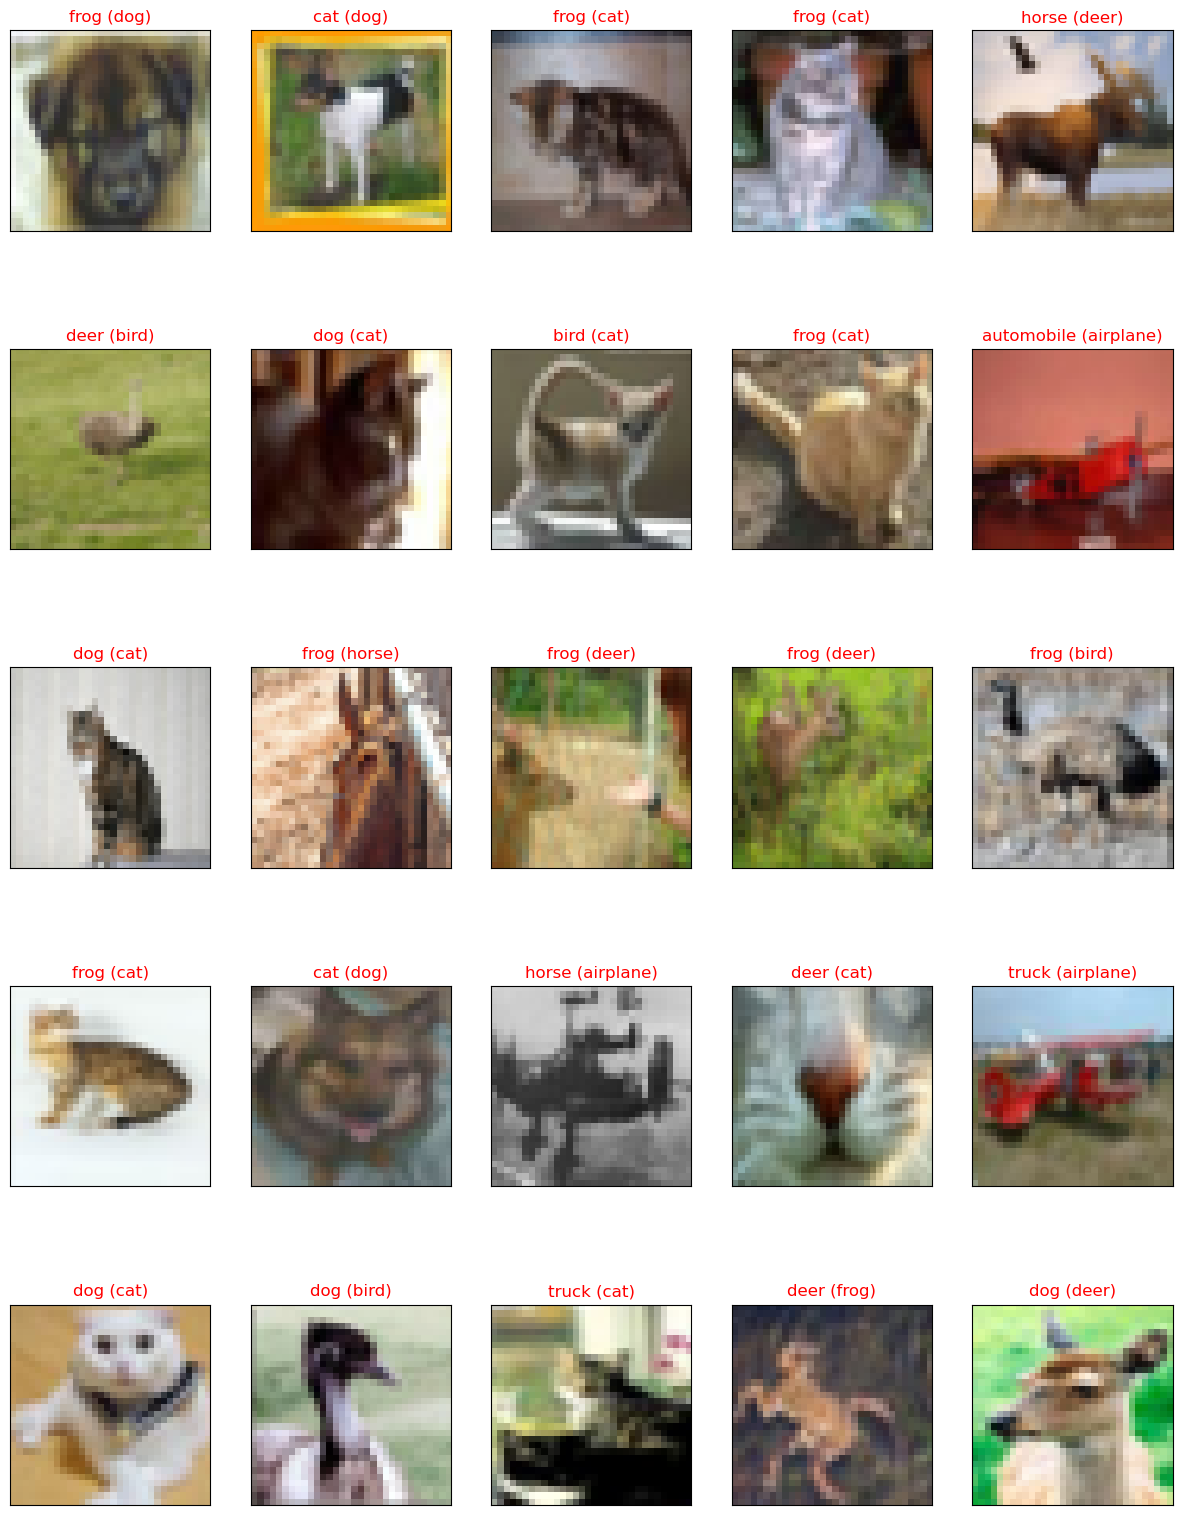

In [14]:
# obtain one batch of test images
dataiterator = iter(test_loader)
plotdata.PlotData.plotmisclassifiedimages(dataiterator=dataiterator,model=cnn_model,classes=classes)

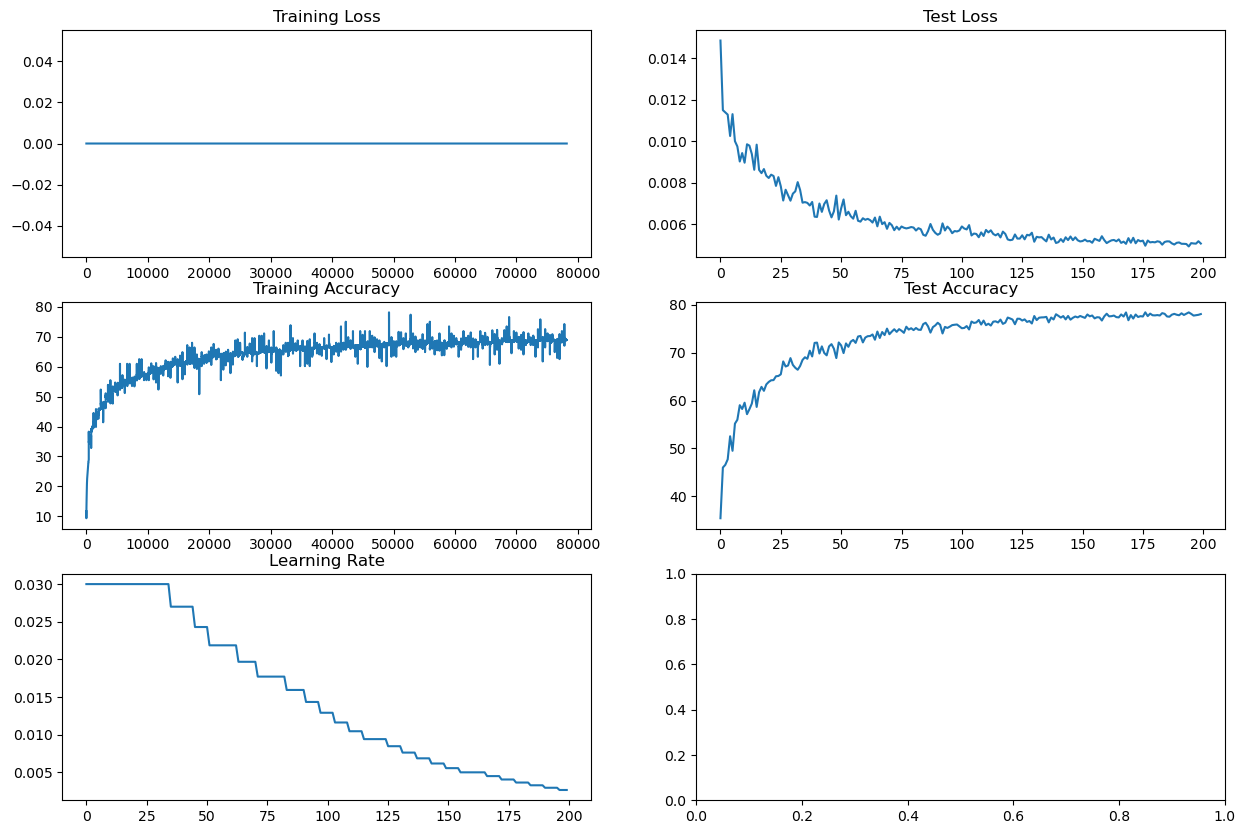

In [15]:
train_losses, train_acc = train_model.gettraindata()
test_losses, test_acc = train_model.gettestdata()
plotdata.PlotData.plottesttraingraph(train_losses=train_losses,train_acc=train_acc,test_losses=test_losses,
                                     test_acc=test_acc,lr_data=lr_data)

In [16]:
utils.Utils.savemodel(model=cnn_model,epoch=epochs,path="savedmodels/finalmodelwithdata.pt",optimizer_state_dict=optimizer.state_dict
                      ,train_losses=train_losses, train_acc=train_acc, test_acc=test_acc,
                      test_losses=test_losses)